In [61]:
from google.colab import drive
import csv
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/steam-2.csv")
print(data)
data.shape

             User                        Game       pop  PlayTime  Unnamed: 4
0       151603712  The Elder Scrolls V Skyrim  purchase       1.0           0
1       151603712  The Elder Scrolls V Skyrim      play     273.0           0
2       151603712                   Fallout 4  purchase       1.0           0
3       151603712                   Fallout 4      play      87.0           0
4       151603712                       Spore  purchase       1.0           0
...           ...                         ...       ...       ...         ...
199995  128470551                 Titan Souls      play       1.5           0
199996  128470551  Grand Theft Auto Vice City  purchase       1.0           0
199997  128470551  Grand Theft Auto Vice City      play       1.5           0
199998  128470551                        RUSH  purchase       1.0           0
199999  128470551                        RUSH      play       1.4           0

[200000 rows x 5 columns]


(200000, 5)

In [64]:
matrix = pd.pivot_table(data,columns='Game', index='User', values='PlayTime',fill_value=0)

In [65]:
matrix


Game,007 Legends,0RBITALIS,"1,00,00,000",1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,140,15 Days,16 Bit Arena,16bit Trader,1701 A.D. Gold Edition,1701 A.D. Sunken Dragon,18 Wheels of Steel American Long Haul,1953 - KGB Unleashed,1953 NATO vs Warsaw Pact,1954 Alcatraz,1Heart,1Quest,3 Stars of Destiny,3089 -- Futuristic Action RPG,3D Mini Golf,3DMark,3DMark 11,3DMark API Overhead feature test,3DMark Cloud Gate benchmark,3DMark Fire Strike benchmark,3DMark Ice Storm benchmark,3DMark Sky Diver benchmark,3DMark Vantage,3SwitcheD,4 Elements,404Sight,500 Years Act 1,60 Seconds!,7 Days to Die,"7 Grand Steps, Step 1 What Ancients Begat",...,Zoo Park,Zooloretto,Zoombinis,Zotrix,Zuma Deluxe,Zuma's Revenge,Zuma's Revenge! - Adventure,aerofly RC 7,bit Dungeon II,ePic Character Generator,eXceed - Gun Bullet Children,eXceed 2nd - Vampire REX,eXceed 3rd - Jade Penetrate Black Package,eden*,fault milestone one,fault milestone two sideabove,hocus,how do you Do It?,iBomber Attack,iBomber Defense,iBomber Defense Pacific,iO,iRacing,ibb & obb,in Space,inMomentum,liteCam Game 100 FPS Game Capture,oO,planetarian ~the reverie of a little planet~,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,samurai_jazz,the static speaks my name,theHunter,theHunter Primal
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
76767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
86540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
103360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
144736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309554670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
309626088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
309812026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0.0,0.0,

In [66]:
def center(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return new_row
matrix_std = matrix.apply(center)

In [67]:
matrix_std

Game,007 Legends,0RBITALIS,"1,00,00,000",1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,140,15 Days,16 Bit Arena,16bit Trader,1701 A.D. Gold Edition,1701 A.D. Sunken Dragon,18 Wheels of Steel American Long Haul,1953 - KGB Unleashed,1953 NATO vs Warsaw Pact,1954 Alcatraz,1Heart,1Quest,3 Stars of Destiny,3089 -- Futuristic Action RPG,3D Mini Golf,3DMark,3DMark 11,3DMark API Overhead feature test,3DMark Cloud Gate benchmark,3DMark Fire Strike benchmark,3DMark Ice Storm benchmark,3DMark Sky Diver benchmark,3DMark Vantage,3SwitcheD,4 Elements,404Sight,500 Years Act 1,60 Seconds!,7 Days to Die,"7 Grand Steps, Step 1 What Ancients Begat",...,Zoo Park,Zooloretto,Zoombinis,Zotrix,Zuma Deluxe,Zuma's Revenge,Zuma's Revenge! - Adventure,aerofly RC 7,bit Dungeon II,ePic Character Generator,eXceed - Gun Bullet Children,eXceed 2nd - Vampire REX,eXceed 3rd - Jade Penetrate Black Package,eden*,fault milestone one,fault milestone two sideabove,hocus,how do you Do It?,iBomber Attack,iBomber Defense,iBomber Defense Pacific,iO,iRacing,ibb & obb,in Space,inMomentum,liteCam Game 100 FPS Game Capture,oO,planetarian ~the reverie of a little planet~,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,samurai_jazz,the static speaks my name,theHunter,theHunter Primal
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5250,-0.000081,-0.000212,-0.000081,-0.000192,-0.0002,-0.0002,-0.000125,-0.000356,-0.000259,-0.000179,-0.000734,-0.000081,-0.000565,-0.000183,-0.000081,-0.000081,-0.000104,-0.000323,-0.000081,-0.000242,-0.000081,-0.000081,-0.000081,-0.000081,-0.000081,-0.000122,-0.000081,-0.001372,-0.001372,-0.001372,-0.001372,-0.001372,-0.000081,-0.000081,-0.000135,-0.000867,-0.000081,-0.000321,-0.000544,-0.000323,...,-0.000161,-0.000081,-0.000081,-0.000081,-0.000303,-0.00009,-0.000117,-0.000081,-0.00024,-0.000081,-0.000161,-0.000161,-0.000161,-0.000117,-0.000081,-0.000081,-0.000081,-0.000799,-0.000081,-0.000179,-0.000315,-0.000161,-0.000081,-0.000432,-0.000081,-0.000182,-0.000081,-0.000129,-0.000125,-0.000081,-0.000081,-0.000385,-0.00013,-0.000477,-0.000081,-0.002124,-0.000081,-0.000807,-0.000573,-0.000101
76767,-0.000081,-0.000212,-0.000081,-0.000192,-0.0002,-0.0002,-0.000125,-0.000356,-0.000259,-0.000179,-0.000734,-0.000081,-0.000565,-0.000183,-0.000081,-0.000081,-0.000104,-0.000323,-0.000081,-0.000242,-0.000081,-0.000081,-0.000081,-0.000081,-0.000081,-0.000122,-0.000081,-0.001372,-0.001372,-0.001372,-0.001372,-0.001372,-0.000081,-0.000081,-0.000135,-0.000867,-0.000081,-0.000321,-0.000544,-0.000323,...,-0.000161,-0.000081,-0.000081,-0.000081,-0.000303,-0.00009,-0.000117,-0.000081,-0.00024,-0.000081,-0.000161,-0.000161,-0.000161,-0.000117,-0.000081,-0.000081,-0.000081,-0.000799,-0.000081,-0.000179,-0.000315,-0.000161,-0.000081,-0.000432,-0.000081,-0.000182,-0.000081,-0.000129,-0.000125,-0.000081,-0.000081,-0.000385,-0.00013,-0.000477,-0.000081,-0.002124,-0.000081,-0.000807,-0.000573,-0.000101
86540,-0.000081,-0.000212,-0.000081,-0.000192,-0.0002,-0.0002,-0.000125,-0.000356,-0.000259,-0.000179,-0.000734,-0.000081,-0.000565,-0.000183,-0.000081,-0.000081,-0.000104,-0.000323,-0.000081,-0.000242,-0.000081,-0.000081,-0.000081,-0.000081,-0.000081,-0.000122,-0.000081,-0.001372,-0.001372,-0.001372,-0.001372,-0.001372,-0.000081,-0.000081,-0.000135,-0.000867,-0.000081,-0.000321,-0.000544,-0.000323,...,-0.000161,-0.000081,-0.000081,-0.000081,-0.000303,-0.00009,-0.000117,-0.000081,-0.00024,-0.000081,-0.000161,-0.000161,-0.000161,-0.000117,-0.000081,-0.000081,-0.000081,-0.000799,-0.000081,-0.000179,-0.000315,-0.000161,-0.000081,-0.000432,-0.000081,-0.000182,-0.000081,-0.000129,-0.000125,-0.000081,-0.000081,-0.000385,-0.00013,-0.000477,-0.000081,-0.002124,-0.000081,-0.000807,-0.000573,-0.000101
103360,-0.000081,-0.000212,-0

In [68]:
a=list(matrix.columns)

In [69]:
len(a)

5155

In [70]:

def gameRec(g):
    dota = matrix_std[g]
    dota = matrix_std.corrwith(dota).dropna()
    gameData = data.groupby('Game').agg({'PlayTime': [np.size, np.mean]})

    gameSim = gameData['PlayTime']['size'] >= 50
    
    df = gameData[gameSim].join(pd.DataFrame(dota, columns=['similarity']))
    return df.sort_values(['similarity'], ascending=False)[:10]

In [71]:
gameRec('Call of Duty Modern Warfare 2')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(PlayTime, size)","(PlayTime, mean)",similarity
Game,,,
Call of Duty Modern Warfare 2,640.0,14.028750,1.000000
Call of Duty Modern Warfare 3,450.0,12.628000,0.209419
DmC Devil May Cry,100.0,5.702000,0.173827
Medieval II Total War,188.0,18.063830,0.126720
Call of Duty Modern Warfare 2 - Multiplayer,634.0,66.802681,0.123722
Medieval II Total War Kingdoms,113.0,15.290265,0.099470
Call of Duty Black Ops,481.0,8.586279,0.088024
Metro Last Light,185.0,6.507568,0.083472
Metro 2033,487.0,3.855647,0.078116


In [72]:
from sklearn.metrics.pairwise import  cosine_similarity
b=cosine_similarity(matrix_std.transpose(),matrix_std.transpose())

In [73]:
b.shape

(5155, 5155)

In [75]:
game_sim_df=pd.DataFrame(b,index=a,columns=a)
game_sim_df

,007 Legends,0RBITALIS,"1,00,00,000",1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,140,15 Days,16 Bit Arena,16bit Trader,1701 A.D. Gold Edition,1701 A.D. Sunken Dragon,18 Wheels of Steel American Long Haul,1953 - KGB Unleashed,1953 NATO vs Warsaw Pact,1954 Alcatraz,1Heart,1Quest,3 Stars of Destiny,3089 -- Futuristic Action RPG,3D Mini Golf,3DMark,3DMark 11,3DMark API Overhead feature test,3DMark Cloud Gate benchmark,3DMark Fire Strike benchmark,3DMark Ice Storm benchmark,3DMark Sky Diver benchmark,3DMark Vantage,3SwitcheD,4 Elements,404Sight,500 Years Act 1,60 Seconds!,7 Days to Die,"7 Grand Steps, Step 1 What Ancients Begat",...,Zoo Park,Zooloretto,Zoombinis,Zotrix,Zuma Deluxe,Zuma's Revenge,Zuma's Revenge! - Adventure,aerofly RC 7,bit Dungeon II,ePic Character Generator,eXceed - Gun Bullet Children,eXceed 2nd - Vampire REX,eXceed 3rd - Jade Penetrate Black Package,eden*,fault milestone one,fault milestone two sideabove,hocus,how do you Do It?,iBomber Attack,iBomber Defense,iBomber Defense Pacific,iO,iRacing,ibb & obb,in Space,inMomentum,liteCam Game 100 FPS Game Capture,oO,planetarian ~the reverie of a little planet~,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,samurai_jazz,the static speaks my name,theHunter,theHunter Primal
007 Legends,1.000000,-0.000139,-0.000081,-0.000161,-0.000167,-0.000148,-0.000110,-0.000216,-0.000193,-0.000154,-0.000287,-0.000081,-0.000214,-0.000131,-0.000081,-0.000081,-0.000100,-0.000161,-0.000081,-0.000140,-0.000081,-0.000081,-0.000081,-0.000081,-0.000081,-0.000120,-0.000081,-0.000333,-0.000333,-0.000333,-0.000333,-0.000333,-0.000081,-0.000081,-0.000124,-0.000296,-0.000081,-0.000203,-0.000339,-0.000161,...,-0.000114,-0.000081,-0.000081,-0.000081,-0.000160,-0.000090,-0.000107,-0.000081,-0.000170,-0.000081,-0.000114,-0.000114,-0.000114,-0.000107,-0.000081,-0.000081,-0.000081,-0.000263,-0.000081,-0.000141,-0.000258,-0.000114,-0.000081,-0.000218,-0.000081,-0.000136,-0.000081,-0.000111,-0.000110,-0.000081,-0.000081,-0.000192,-0.000111,-0.000264,-0.000081,-0.000738,-0.000081,-0.000283,-0.000500,-0.000099
0RBITALIS,-0.000139,1.000000,-0.000139,-0.000278,0.266402,-0.000255,-0.000189,-0.000372,-0.000333,-0.000265,-0.000495,-0.000139,-0.000368,-0.000225,-0.000139,-0.000139,-0.000173,-0.000278,-0.000139,-0.000241,-0.000139,-0.000139,-0.000139,-0.000139,-0.000139,-0.000207,-0.000139,-0.000574,-0.000574,-0.000574,-0.000574,-0.000574,-0.000139,-0.000139,-0.000214,-0.000511,-0.000139,-0.000349,-0.000583,-0.000278,...,-0.000197,-0.000139,-0.000139,-0.000139,-0.000276,-0.000154,-0.000184,-0.000139,-0.000293,-0.000139,-0.000197,-0.000197,-0.000197,-0.000184,-0.000139,-0.000139,-0.000139,-0.000454,-0.000139,-0.000242,-0.000444,-0.000197,-0.000139,-0.000376,-0.000139,-0.000234,-0.000139,-0.000191,-0.000189,-0.000139,-0.000139,-0.000331,-0.000191,-0.000455,-0.000139,-0.001273,-0.000139,-0.000487,0.008847,-0.000171
"1,00,00,000",-0.000081,-0.000139,1.000000,-0.000161,-0.000167,-0.000148,-0.000110,-0.000216,-0.000193,-0.000154,-0.000287,-0.000081,-0.000214,-0.000131,-0.000081,-0.000081,-0.000100,-0.000161,-0.000081,-0.000140,-0.000081,-0.000081,-0.000081,-0.000081,-0.000081,-0.000120,-0.000081,-0.000333,-0.000333,-0.000333,-0.000333,-0.000333,-0.000081,-0.000081,-0.000124,-0.000296,-0.000081,-0.000203,-0.000339,0.499939,...,-0.000114,-0.000081,-0.000081,-0.000081,-0.000160,-0.000090,-0.000107,-0.000081,0.205103,-0.000081,-0.000114,-0.000114,-0.000114,-0.000107,-0.000081,-0.000081,-0.000081,-0.000263,-0.000081,-0.000141,-0.000258,0.707078,-0.000081,0.234878,-0.000081,-0.000136,-0.000081,-0.000111,-0.000110,-0.000081,-0.000081,0.452957,-0.000111,-0.000264,-0.000081,-0.000738,-0.000081,-0.000283,-0.000500,-0.000099
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),-0.000161,-0.000278,-0.000161,

In [17]:
def get_games(game, playtime):
    sim = game_sim_df[game]*playtime
    sim = sim.sort_values(ascending=False)
    return sim[:5]


In [18]:
print(get_games('Call of Duty Modern Warfare 2',100))

Call of Duty Modern Warfare 2                  100.000000
Call of Duty Modern Warfare 3                   20.941870
DmC Devil May Cry                               17.382735
Medieval II Total War                           12.671971
Call of Duty Modern Warfare 2 - Multiplayer     12.372231
Name: Call of Duty Modern Warfare 2, dtype: float64


In [19]:
gamer=[('BioShock',150),('The Elder Scrolls V Skyrim',200),('Tomb Raider',200)]
gamer_df = pd.DataFrame()
for game, play in gamer:
    gamer_df = gamer_df.append(get_games(game,play), ignore_index=True)
print(gamer_df.sum().sort_values(ascending=False))
    

The Elder Scrolls V Skyrim                 200.000000
Tomb Raider                                200.000000
BioShock                                   150.000000
BioShock Infinite                           92.645242
Skyrim High Resolution Texture Pack         84.194044
The Elder Scrolls V Skyrim - Dragonborn     83.946309
The Elder Scrolls V Skyrim - Dawnguard      82.382348
Toy Soldiers                                78.312447
Lara Croft and the Temple of Osiris         62.771773
BioShock 2                                  52.913821
Tesla Effect                                43.930367
Lara Croft and the Guardian of Light        43.794017
Deus Ex Invisible War                       31.452659
The Elder Scrolls IV Oblivion               30.953599
Chompy Chomp Chomp                          29.181401
dtype: float64


## Matrix Factorization 

In [20]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/steam-200k.csv', header=None).drop(4,axis=1)
df.columns = ['user', 'game', 'action', 'hours']

In [21]:
df[:10]

,user,game,action,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
5,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,purchase,1.0
7,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,purchase,1.0
9,151603712,Left 4 Dead 2,play,8.9


In [22]:
df = df[df['action'] == 'play'].copy()

In [23]:
userbyitem = pd.DataFrame(index=df['user'].unique(), columns=df['game'].unique())

In [24]:
for i in range(len(df)):
    user = df.iloc[i]['user']
    game = df.iloc[i]['game']
    userbyitem.loc[user,game] = df.iloc[i]['hours']

In [25]:
userbyitem

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,273,87,14.9,12.1,8.9,8.5,8.1,7.5,3.3,2.8,2.5,2,1.4,1.3,1.3,0.8,0.8,0.6,0.5,0.5,0.5,0.5,0.5,0.4,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238,84,22,13.8,10.2,7.8,7,5.2,4.8,3.4,3.2,2.8,2.6,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,0.5,7.5,71,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,5.9,1.3,NaN,NaN,NaN,0.6,NaN,NaN,NaN,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125424716,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99096740,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ubyi = userbyitem
ubyi[:10]

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,273,87,14.9,12.1,8.9,8.5,8.1,7.5,3.3,2.8,2.5,2,1.4,1.3,1.3,0.8,0.8,0.6,0.5,0.5,0.5,0.5,0.5,0.4,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238,84,22,13.8,10.2,7.8,7,5.2,4.8,3.4,3.2,2.8,2.6,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,0.5,7.5,71,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,5.9,1.3,NaN,NaN,NaN,0.6,NaN,NaN,NaN,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176410694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197278511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [27]:
idin=int(input("Enter ID:  "))
member=input("Enter Name:  ")
nog=int(input("Enter Number of Games:  "))
print(member, idin)
for i in range(nog):
    game=input("Enter name of Game:  ")
    hours=float(input("Enter Hours played:  "))
    print(idin, game,hours)
    ubyi.loc[idin,game] = hours
    ('BioShock',150),('Fallout 4',100),('Tomb Raider',200)

Enter ID:  0
Enter Name:  Sid
Enter Number of Games:  3
Sid 0
Enter name of Game:  BioShock
Enter Hours played:  150
0 BioShock 150.0
Enter name of Game:  Fallout 4
Enter Hours played:  100
0 Fallout 4 100.0
Enter name of Game:  Tomb Raider
Enter Hours played:  200
0 Tomb Raider 200.0


In [28]:
ubyi=ubyi.astype(float)

In [29]:
ubyi.tail(5)

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
99096740,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176449171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128470551,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualizing the data normalization

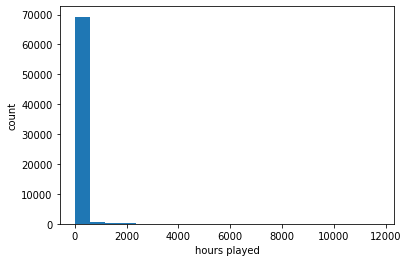

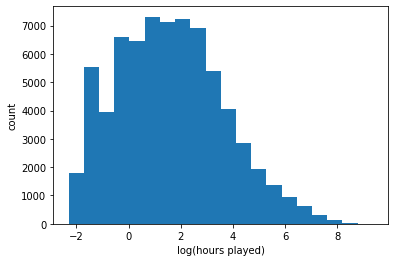

In [30]:
plt.hist(ubyi.values.flatten(), bins=20)
plt.xlabel('hours played')
plt.ylabel('count')
plt.show()
plt.hist(np.log(ubyi.values.flatten()), bins=20)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.show()

In [31]:
ubyi_norm = np.log(ubyi)
ubyi_norm += abs(ubyi_norm.min().min())
print(ubyi_norm.min().min(), ubyi_norm.max().max())
#take out users that haven't rated at least 3 games
ubyi_norm = ubyi_norm[(~ubyi_norm.isnull()).sum(axis=1) >= 3]
ubyi_norm

0.0 11.674533980166641


,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,7.912057,6.768493,5.003946,4.795791,4.488636,4.442651,4.394449,4.317488,3.496508,3.332205,3.218876,2.995732,2.639057,2.564949,2.564949,2.079442,2.079442,1.791759,1.609438,1.609438,1.609438,1.609438,1.609438,1.386294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,6.363028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.774856,6.733402,5.393628,4.927254,4.624973,4.356709,4.248495,3.951244,3.871201,3.526361,3.465736,3.332205,3.258097,3.135494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,1.609438,4.317488,6.565265,NaN,NaN,NaN,2.833213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.708050,NaN,NaN,NaN,NaN,2.079442,NaN,NaN,NaN,NaN,NaN,4.077537,2.564949,NaN,NaN,NaN,1.791759,NaN,NaN,NaN,4.564348,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297811211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.615121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99096740,6.109248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.123964,NaN,NaN,5.857933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.743319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.560682,...,NaN,NaN,Na

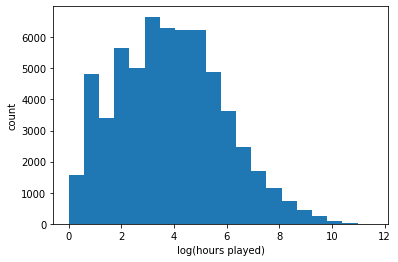

In [32]:
plt.hist(ubyi_norm.values.flatten(), bins=20)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
class ExplicitMF:
   
    def __init__(self, n_iters, n_factors, reg):
        self.reg = reg
        self.n_iters = n_iters
        self.n_factors = n_factors  
        
    def fit(self, train):
      
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))

        self.train_mse_record = []   
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(train, self.user_factors, self.item_factors)
            self.item_factors = self._als_step(train.T, self.item_factors, self.user_factors) 
            predictions = self.predict()
            train_mse = self.compute_mse(train, predictions)
            self.train_mse_record.append(train_mse)
        
        return self    
    
    def _als_step(self, ratings, solve_vecs, fixed_vecs):
       
        A = fixed_vecs.T.dot(fixed_vecs) + np.eye(self.n_factors) * self.reg
        b = ratings.dot(fixed_vecs)
        A_inv = np.linalg.inv(A)
        solve_vecs = b.dot(A_inv)
        return solve_vecs
    
    def predict(self):
        pred = self.user_factors.dot(self.item_factors.T)
        return pred
    
    @staticmethod
    def compute_mse(y_true, y_pred):
        mask = np.nonzero(y_true)
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        return mse

In [34]:
def plot_learning_curve(model):
 
    linewidth = 3
    plt.plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()

In [35]:
ubyi_norm_0 = ubyi_norm.fillna(0)

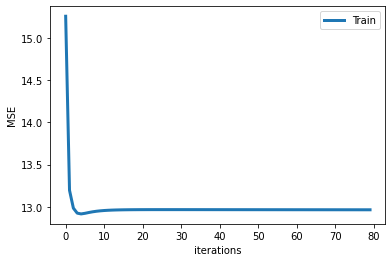

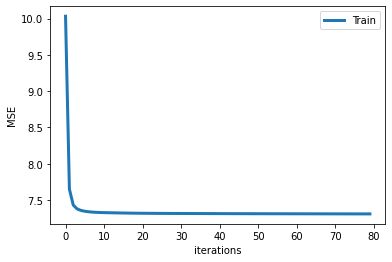

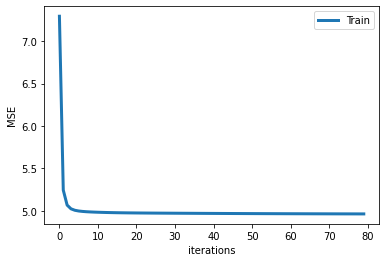

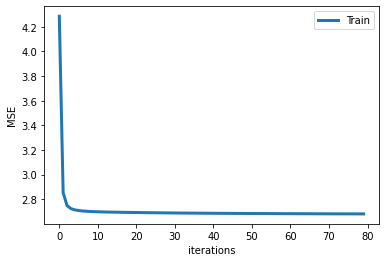

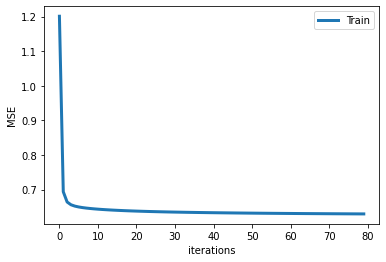

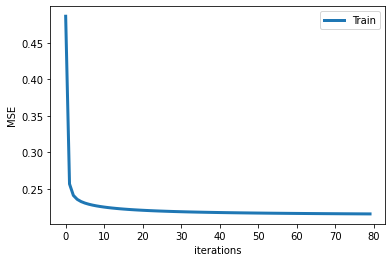

In [36]:
als_min_history = []
for i in [5,50,100,200,500,750]:
    als = ExplicitMF(n_iters = 80, n_factors = i, reg = 0.01)
    als.fit(ubyi_norm_0.to_numpy())
    plot_learning_curve(als)
    als_min_history.append(min(als.train_mse_record))

Text(0, 0.5, 'MSE')

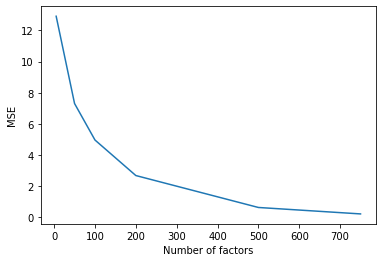

In [37]:
plt.plot([5,50,100,200,500,750], als_min_history)
plt.xlabel('Number of factors')
plt.ylabel('MSE')

In [38]:
als = ExplicitMF(n_iters = 50, n_factors =750, reg = 0.01)
als.fit(ubyi_norm_0.to_numpy())

In [39]:
lf_prod = np.matmul(als.user_factors, als.item_factors.T)

In [40]:
ubyi_mf = pd.DataFrame(lf_prod, index=ubyi_norm.index.values, columns=ubyi_norm.columns.values)


In [76]:
ubyi_mf

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Dota 2,BioShock,Robocraft,Garry's Mod,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,Orcs Must Die!,THE KING OF FIGHTERS XIII STEAM EDITION,Skullgirls,Assassin's Creed II,Company of Heroes Opposing Fronts,...,Victoria II,Tropico 3 Absolute Power,Remember Me,Depth,Devil May Cry 4,The Incredible Adventures of Van Helsing,Grim Dawn,NBA 2K14,"Pirates, Vikings, & Knights II",Subnautica,Emily is Away,Lost Planet 3,Assetto Corsa,Ryse Son of Rome,Primal Carnage,Stronghold Crusader 2,Sleeping Dogs Definitive Edition,Viscera Cleanup Detail Santa's Rampage,Spore Galactic Adventures,Block N Load,Dizzel,Grey Goo,Godus,Super Monday Night Combat,Baldur's Gate II Enhanced Edition,To the Moon,Hitman Blood Money,Giana Sisters Twisted Dreams,DOOM 3,Deus Ex Human Revolution - The Missing Link,Might & Magic Duel of Champions,"Warhammer 40,000 Dawn of War - Game of the Year Edition",Cities in Motion 2,BeamNG.drive,Echo of Soul,Dungeons & Dragons Online,Borderlands 2 RU,Loadout Campaign Beta,"Warhammer 40,000 Dawn of War Soulstorm",Command and Conquer 3 Tiberium Wars
151603712,7.899413,6.719125,4.887844,4.790382,4.484717,4.093252,4.397402,3.496997,3.341338,3.198179,2.457286,2.619693,2.564863,2.504987,1.993169,1.805627,1.553623,1.596356,1.602639,1.608015,1.382516,0.000476,-0.048108,-0.047393,-0.017477,-0.054503,-0.073267,0.010392,0.030148,0.020777,0.007011,0.028133,0.072046,0.170367,-0.000890,-0.036595,0.033225,-0.081022,-0.012593,0.020608,...,0.147580,-0.003688,-0.147130,-0.030288,0.049774,-0.060244,-0.068616,0.080830,0.087031,0.138116,-0.019329,-0.032226,-0.068574,0.162761,0.039707,-0.155738,0.073755,0.201784,0.163771,0.100015,0.046419,0.076163,-0.016939,-0.025002,0.087005,0.079243,-0.127557,-0.032000,0.074243,0.009250,-0.039644,-0.156222,0.098661,-0.026369,-0.057943,-0.030643,0.138755,-0.015010,-0.116355,-0.011478
59945701,6.362112,-0.002796,0.007716,0.020773,0.000102,-0.038844,-0.017990,-0.022783,-0.000616,0.014488,-0.106931,0.040962,0.002156,0.077541,-0.039473,-0.044798,0.001006,0.021129,-0.009115,-0.024280,-0.014103,-0.008817,7.312796,6.503395,5.399581,4.836199,4.169776,4.353237,3.939154,3.853876,3.538524,3.415349,3.179024,3.260151,3.137357,1.833288,1.315978,1.149357,1.176013,0.218797,...,0.046119,-0.069090,-0.125219,0.036869,-0.175332,-0.047419,0.096177,0.046569,-0.156411,-0.065987,0.042382,-0.186734,-0.017344,0.052247,0.148883,-0.044649,-0.051530,-0.083839,0.040118,0.009276,0.053137,-0.071613,-0.010506,0.032891,-0.204151,0.024922,-0.006871,0.052037,-0.024325,-0.041811,0.012132,0.011164,-0.062179,0.006288,0.052962,-0.015278,-0.011507,-0.069837,-0.024153,-0.069990
53875128,0.007823,-0.001589,1.612091,4.301713,6.555036,-0.004123,0.005879,2.827042,-0.001822,-0.000010,-0.047430,0.007461,-0.000085,0.013336,0.004477,2.706910,-0.003982,-0.003053,-0.003144,2.084232,-0.010989,-0.001628,0.024931,-0.027917,4.078774,2.556856,0.011842,0.000932,1.785297,-0.000751,0.014503,0.008907,4.573123,-0.010974,-0.001991,-0.006364,-0.026838,0.028736,5.825916,-0.015306,...,0.018585,0.001064,-0.005384,-0.006490,-0.012632,-0.020033,0.028683,-0.031022,-0.040112,-0.012455,-0.034901,-0.021904,-0.049032,-0.040895,0.019302,0.041987,0.014589,-0.037780,0.033038,0.046004,0.000447,0.041065,0.077121,0.020716,0.047788,-0.033551,0.047268,0.002858,0.018306,-0.004857,0.003184,-0.031513,0.016945,-0.057407,-0.023709,-0.023705,-0.003711,-0.037663,-0.022009,-0.022543
26122540,-0.001143,0.006341,0.003126,0.005169,0.000448,0.002961,0.001432,0.011316,0.005636,-0.007680,0.0105

In [41]:
def recommend_a_game3(user):
    recommend=ubyi_mf.loc[user].sort_values(ascending=False)[3:14].index.values
    for i,j in enumerate(recommend):
        print("{0}: {1}".format(i,j))

In [42]:
recommend_a_game3(0)

0: BioShock 2
1: March of War
2: Uplink
3: Penny Arcade's On the Rain-Slick Precipice of Darkness 3
4: Braid
5: Dungeons & Dragons Daggerdale
6: Lara Croft and the Temple of Osiris
7: IL-2 Sturmovik 1946
8: White Noise Online
9: Aion
10: Teenage Mutant Ninja Turtles Out of the Shadows


(array([3.46e+03, 8.30e+01, 3.20e+01, 8.00e+00, 2.00e+00, 5.00e+00,
        2.00e+00, 1.00e+00, 1.00e+00, 3.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 1.00e+00]),
 array([-3.90865500e-01,  3.48533776e+02,  6.97458418e+02,  1.04638306e+03,
         1.39530770e+03,  1.74423234e+03,  2.09315698e+03,  2.44208163e+03,
         2.79100627e+03,  3.13993091e+03,  3.48885555e+03,  3.83778019e+03,
         4.18670483e+03,  4.53562947e+03,  4.88455412e+03,  5.23347876e+03,
         5.58240340e+03,  5.93132804e+03,  6.28025268e+03,  6.62917732e+03,
         6.97810197e+03]),
 <a list of 20 Patch objects>)

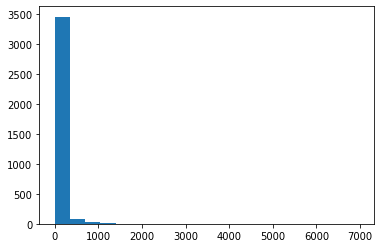

In [43]:
plt.hist(ubyi_mf.sum(),bins=20)

In [44]:
ubyi_mf.drop([col for col, val in ubyi_mf.sum().iteritems() if val < 50], axis=1, inplace=True)

In [45]:
def recommend_a_game4(user):
    recommend=ubyi_mf.loc[user].sort_values(ascending=False)[3:14].index.values
    for i,j in enumerate(recommend):
        print("{0}: {1}".format(i,j))

In [46]:
recommend_a_game4(0)

0: BioShock 2
1: Braid
2: Guacamelee! Gold Edition
3: Amnesia A Machine for Pigs
4: DLC Quest
5: Game of Thrones - A Telltale Games Series
6: Assassin's Creed
7: TrackMania Stadium
8: Atom Zombie Smasher 
9: F.E.A.R. 2 Project Origin
10: Primal Carnage


RAting and Genre

In [47]:
rate_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/steam_games_reviews.csv",usecols=["name","percentage_positive_review"])
print(rate_data)
rate_data.shape

                                                    name  percentage_positive_review
0                                                   DOOM                          92
1                          PLAYERUNKNOWN'S BATTLEGROUNDS                          49
2                                             BATTLETECH                          71
3                                                   DayZ                          61
4                                             EVE Online                          74
...                                                  ...                         ...
40828  Rocksmith® 2014 Edition – Remastered – Sabaton...                          -1
40829  Rocksmith® 2014 Edition – Remastered – Stone T...                          -1
40830  Fantasy Grounds - Quests of Doom 4: A Midnight...                          -1
40831                       Mega Man X5 Sound Collection                          -1
40832                                   Stories In Stone         

(40833, 2)

In [48]:
for i in range(len(rate_data["percentage_positive_review"])):
    if(rate_data["percentage_positive_review"][i]<=0):
        rate_data["percentage_positive_review"][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
rate_data

,name,percentage_positive_review
0,DOOM,92
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49
2,BATTLETECH,71
3,DayZ,61
4,EVE Online,74
...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,0
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,0
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,0
40831,Mega Man X5 Sound Collection,0


In [50]:
genre_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/processed_games_for_content-based.csv",usecols=["name","genre"])
print(genre_data)
genre_data.shape

                                    name                                              genre
0                                   DayZ              Action,Adventure,MassivelyMultiplayer
1                             EVE Online  Action,FreetoPlay,MassivelyMultiplayer,RPG,Str...
2                                   TERA  Action,Adventure,FreetoPlay,MassivelyMultiplay...
3                            Stonehearth                          Indie,Simulation,Strategy
4               Call of Duty®: Black Ops                                             Action
...                                  ...                                                ...
3031                           Black Ink  Animation&Modeling,Design&Illustration,PhotoEd...
3032                            The Deer                                    Adventure,Indie
3033  Tank Operations: European Campaign                               Strategy,EarlyAccess
3034                            King-Dom                                        

(3036, 2)

In [51]:
genre_data["genre"].fillna("None",inplace=True)

In [52]:
for i in range(len(genre_data["genre"])):
    a=genre_data["genre"][i].split(",")
    genre_data["genre"][i]=a[0]

In [53]:
genre_data

,name,genre
0,DayZ,Action
1,EVE Online,Action
2,TERA,Action
3,Stonehearth,Indie
4,Call of Duty®: Black Ops,Action
...,...,...
3031,Black Ink,Animation&Modeling
3032,The Deer,Adventure
3033,Tank Operations: European Campaign,Strategy
3034,King-Dom,Strategy


In [54]:
genre_data["Rating"]=0

In [55]:
for i in range(len(genre_data["name"])):
    for j in range(len(rate_data["name"])):
        if(genre_data["name"][i]==rate_data["name"][j]):
            genre_data["Rating"][i]=rate_data["percentage_positive_review"][j]
            break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
genre_data

,name,genre,Rating
0,DayZ,Action,61
1,EVE Online,Action,74
2,TERA,Action,78
3,Stonehearth,Indie,75
4,Call of Duty®: Black Ops,Action,84
...,...,...,...
3031,Black Ink,Animation&Modeling,88
3032,The Deer,Adventure,70
3033,Tank Operations: European Campaign,Strategy,0
3034,King-Dom,Strategy,0


## Rating + cosine

In [57]:
a=[]
b=[0]*20
def get_games(game, playtime):
    sim = game_sim_df[game]*playtime
    sim = sim.sort_values(ascending=False)
    a=sim[0:20].index
    for i in range(len(a)):
        flag=0
        for j in range(len(rate_data["name"])):
            if(a[i]==rate_data["name"][j]):
                b[i]=rate_data["percentage_positive_review"][j]
                flag=1
                sim[i]=sim[i]*(b[i]/20)
        if(flag==0):
            sim[i]=sim[i]*2.5
    sim = sim.sort_values(ascending=False)
    return sim[:5]
    
    

In [58]:
print(get_games('Tomb Raider',150))

Tomb Raider                             712.500000
BioShock Infinite                       330.048674
Lara Croft and the Guardian of Light    151.089359
Outcast 1.1                             149.361889
Gray Matter                             141.177184
Name: Tomb Raider, dtype: float64


In [59]:
gamer=[('BioShock',150),('The Elder Scrolls V Skyrim',200),('Tomb Raider',200)]
gamer_df = pd.DataFrame()
for game, play in gamer:
    gamer_df = gamer_df.append(get_games(game,play), ignore_index=True)
print(gamer_df.sum().sort_values(ascending=False))
    

Tomb Raider                                950.000000
BioShock Infinite                          561.099911
The Elder Scrolls V Skyrim                 500.000000
BioShock                                   375.000000
Toy Soldiers                               352.406011
Skyrim High Resolution Texture Pack        210.485110
The Elder Scrolls V Skyrim - Dragonborn    209.865772
The Elder Scrolls V Skyrim - Dawnguard     205.955871
Lara Croft and the Guardian of Light       201.452479
Outcast 1.1                                199.149185
Gray Matter                                188.236245
BioShock 2                                 132.284551
System Shock 2                             114.938859
Red Faction Guerrilla Steam Edition        114.536661
dtype: float64
